<a href="https://colab.research.google.com/github/yeseniaramos9346-hash/Estad-stica2026/blob/main/test_energy/prueba_energia_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
link="https://raw.githubusercontent.com/yeseniaramos9346-hash/Estad-stica2026/refs/heads/main/test_energy/test_energy_data.csv"
df=pd.read_csv(link)
df

,edificio,pies_cuadrados,numero_ocupantes,aparatos,temperatura,dia,energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [9]:
#Establecer variables
x=df["pies_cuadrados"]
y=df["energia"]


In [ ]:
3#Quire seguir una linea recta

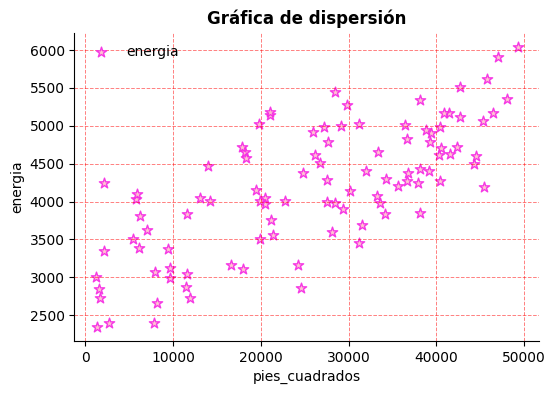

In [11]:
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4), #tamaño (ancho,alto)
    dpi=100 #resolución
)
#definir variables
x=df["pies_cuadrados"]
y=df["energia"]
#gráfico de disperción
plt.scatter(
    x,y,
    marker="*",
    color="pink",
    edgecolor="#f527E4", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de cada punto
    label="energia" #etiqueta

)
#Titulo
plt.title(
    "Gráfica de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiqueta eje x
plt.xlabel(
    "pies_cuadrados",
    fontsize=10
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#Tamaño de ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)
#malla
plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #Ancho de linea
    alpha=0.5, #transparencia
    color="red"
)
#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon=False,
    #bbox_to_anchor=(0.5,-0.15)
)
#Guardar Imagen
plt.savefig(
    "dispersión",
    bbox_inches="tight"
)

In [12]:
4#Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, valor_p=pearsonr(x,y) # p es prueba de hipotesis
# H0:P=0 no hay correlación
# H1: P\0 si hay correlación, correlacion:el cambio en una variable esta vinculado con el cambio de otra variable
print(f"coeficiente de correlación (r): {r:0.4f}")
print(f"valor_p: {valor_p:0.4f}")

coeficiente de correlación (r): 0.7240
valor_p: 0.0000


El valor p es menor al nivel de significancia por lo tanto se rechaza ho y si hay correlación

In [13]:
#5 Calcule el coeficiente de determinación e interprete el resultado.
print(f"coeficiente de determinación:{r**2:0.4f}")

coeficiente de determinación:0.5242


In [14]:
#6 Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params

,0
const,3049.682473
pies_cuadrados,0.043965


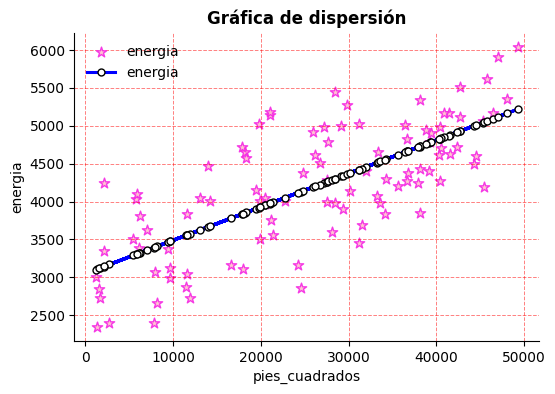

In [15]:
#Grafico de dispersión
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4), #tamaño (ancho,alto)
    dpi=100 #resolución
)

plt.scatter(
    x,y,
    marker="*",
    color="pink",
    edgecolor="#f527E4", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de cada punto
    label="energia" #etiqueta

)
plt.plot(
    x,y_calculada,
    marker="o",
    color="blue",
    linewidth=2.2,
    linestyle="-",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="energia"
)
#Titulo
plt.title(
    "Gráfica de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiqueta eje x
plt.xlabel(
    "pies_cuadrados",
    fontsize=10
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#Tamaño de ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)
#malla
plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #Ancho de linea
    alpha=0.5, #transparencia
    color="red"
)
#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon=False,
    #bbox_to_anchor=(0.5,-0.15)
)
#Guardar Imagen
plt.savefig(
    "dispersión",
    bbox_inches="tight"
)

In [16]:
#7 Intervalo de confianza
modelo.conf_int(alpha=0.05)

,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


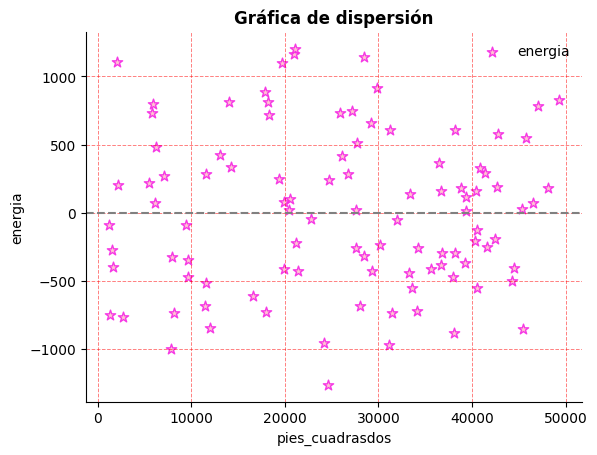

In [17]:
#8 Residuales
residuales=modelo.resid
#Grafico de dispersión
plt.scatter(
    x, residuales,
    marker="*",
    color="pink",
    edgecolor="#f527E4", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de cada punto
    label="energia" #etiqueta

)
plt.axhline(y=0, color="gray", linestyle="--") #linea horizontal
#Titulo
plt.title(
    "Gráfica de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiqueta eje x
plt.xlabel(
    "pies_cuadrasdos",
    fontsize=10
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#Tamaño de ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)
#malla
plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #Ancho de linea
    alpha=0.5, #transparencia
    color="red"
)
#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon=False,
    #bbox_to_anchor=(0.5,-0.15)
)
#Guardar Imagen
plt.savefig(
    "dispersión",
    bbox_inches="tight"
)

In [18]:
#9 Test de Shapiro
from scipy.stats import shapiro
estadistico, valor_p=shapiro (residuales)
print(f"valor_p: {valor_p:0.4f}")

valor_p: 0.1608


In [19]:
#10 Test de Breusch-Pagan
from statsmodels.stats.api import het_breuschpagan
estadistico_1,valor_p_1,estadistico_2,valor_p_2=het_breuschpagan(residuales,x_constante)
print(f"valor-p:{valor_p_1:0.4f}")
#H0:No hay heterocedasticidad (varianza uniforme)
#h1:Hay heterocedasticidad (varianza no uniforme)
#Como el valor p es mayor al nivel de significancia, entonces la h0 es verdadera

valor-p:0.1022


In [20]:
#11
df.describe()

,pies_cuadrados,numero_ocupantes,aparatos,temperatura,energia
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [ ]:
modelo.predict([1,3])